In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
try:
    # Try loading from local file first
    df = pd.read_csv(r"C:\Users\gudek\Downloads\heart.csv")
except:
    # If file not found, we'll use a built-in dataset or download
    print("Dataset file not found. Using alternative dataset...")
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget distribution:")
print(df['target'].value_counts())

Dataset Shape: (1025, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Basic Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025

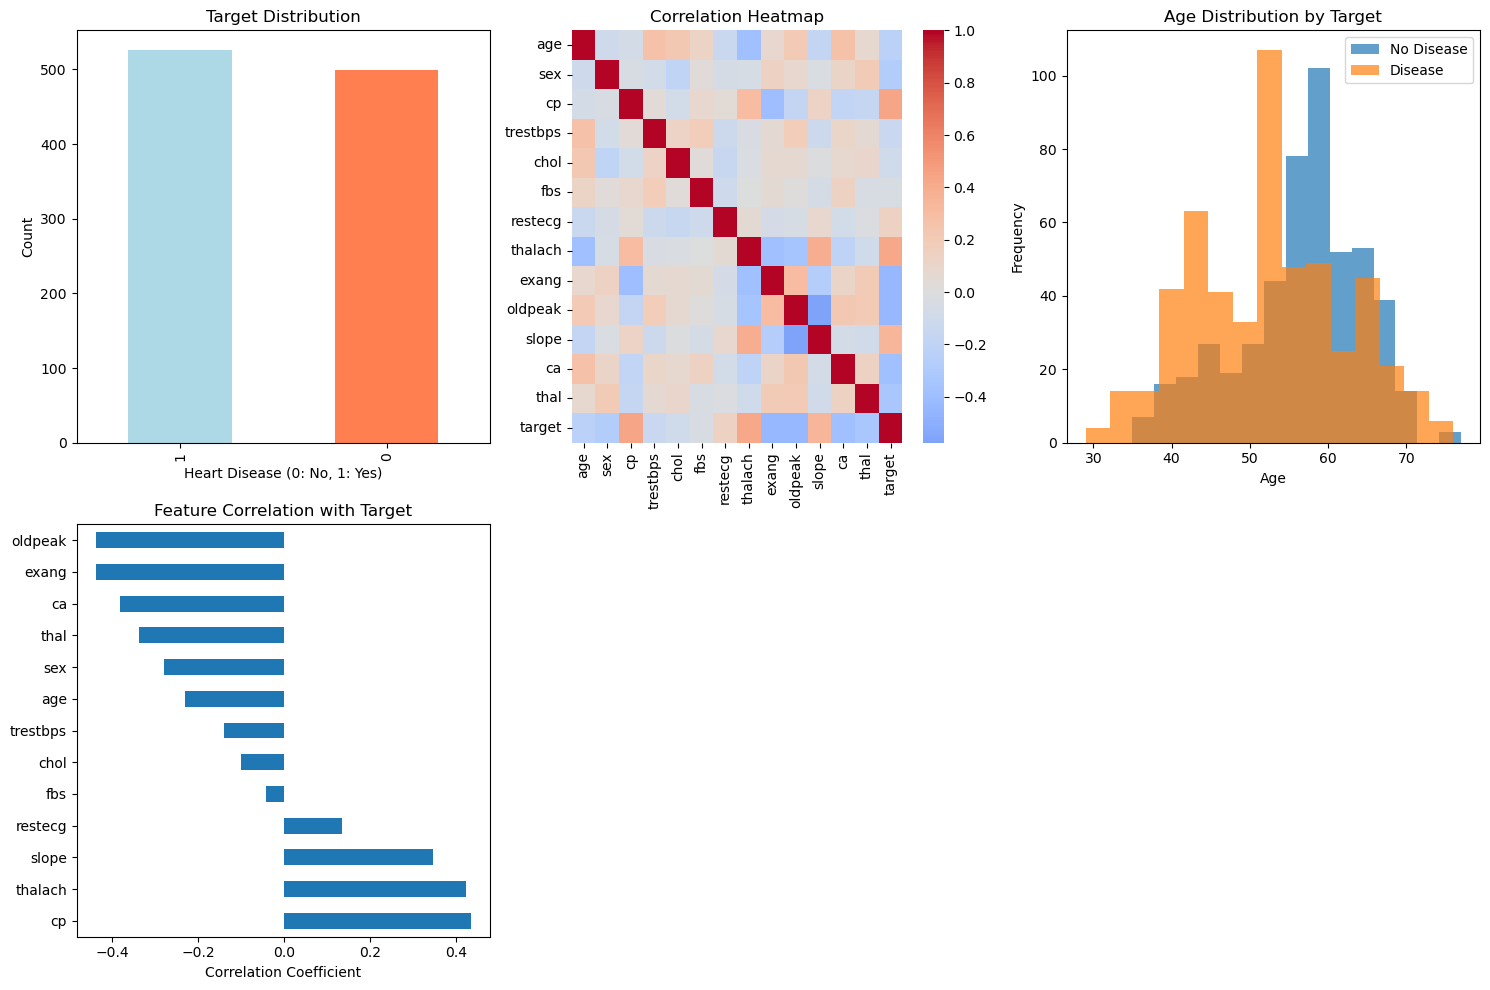


Training set size: (717, 13)
Test set size: (308, 13)

Training set class distribution:
target
1    368
0    349
Name: count, dtype: int64

Test set class distribution:
target
1    158
0    150
Name: count, dtype: int64


In [2]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Visualize the data
plt.figure(figsize=(15, 10))

# Plot 1: Target distribution
plt.subplot(2, 3, 1)
df['target'].value_counts().plot(kind='bar', color=['lightblue', 'coral'])
plt.title('Target Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')

# Plot 2: Correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

# Plot 3: Feature distributions by target
if 'age' in df.columns:
    plt.subplot(2, 3, 3)
    plt.hist(df[df['target'] == 0]['age'], alpha=0.7, label='No Disease', bins=15)
    plt.hist(df[df['target'] == 1]['age'], alpha=0.7, label='Disease', bins=15)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution by Target')
    plt.legend()

# Plot 4: Feature importance preview (correlation with target)
plt.subplot(2, 3, 4)
corr_with_target = df.corr()['target'].drop('target').sort_values(ascending=False)
corr_with_target.plot(kind='barh')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()

# Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"\nTest set class distribution:\n{y_test.value_counts()}")

In [3]:
# Create and train a basic decision tree
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)

# Make predictions
y_pred_dt_basic = dt_basic.predict(X_test)
y_pred_proba_dt_basic = dt_basic.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_dt_basic = accuracy_score(y_test, y_pred_dt_basic)
precision_dt_basic = precision_score(y_test, y_pred_dt_basic)
recall_dt_basic = recall_score(y_test, y_pred_dt_basic)
f1_dt_basic = f1_score(y_test, y_pred_dt_basic)
auc_dt_basic = roc_auc_score(y_test, y_pred_proba_dt_basic)

print("DECISION TREE - BASIC MODEL (No hyperparameter tuning):")
print("=" * 60)
print(f"Accuracy:  {accuracy_dt_basic:.4f}")
print(f"Precision: {precision_dt_basic:.4f}")
print(f"Recall:    {recall_dt_basic:.4f}")
print(f"F1-Score:  {f1_dt_basic:.4f}")
print(f"ROC-AUC:   {auc_dt_basic:.4f}")
print(f"Tree Depth: {dt_basic.get_depth()}")
print(f"Number of Leaves: {dt_basic.get_n_leaves()}")

# Display tree structure
print(f"\nTree Structure:")
print(f"- Depth: {dt_basic.get_depth()}")
print(f"- Number of leaves: {dt_basic.get_n_leaves()}")
print(f"- Number of features used: {np.sum(dt_basic.feature_importances_ > 0)}")

DECISION TREE - BASIC MODEL (No hyperparameter tuning):
Accuracy:  0.9805
Precision: 1.0000
Recall:    0.9620
F1-Score:  0.9806
ROC-AUC:   0.9810
Tree Depth: 9
Number of Leaves: 49

Tree Structure:
- Depth: 9
- Number of leaves: 49
- Number of features used: 11


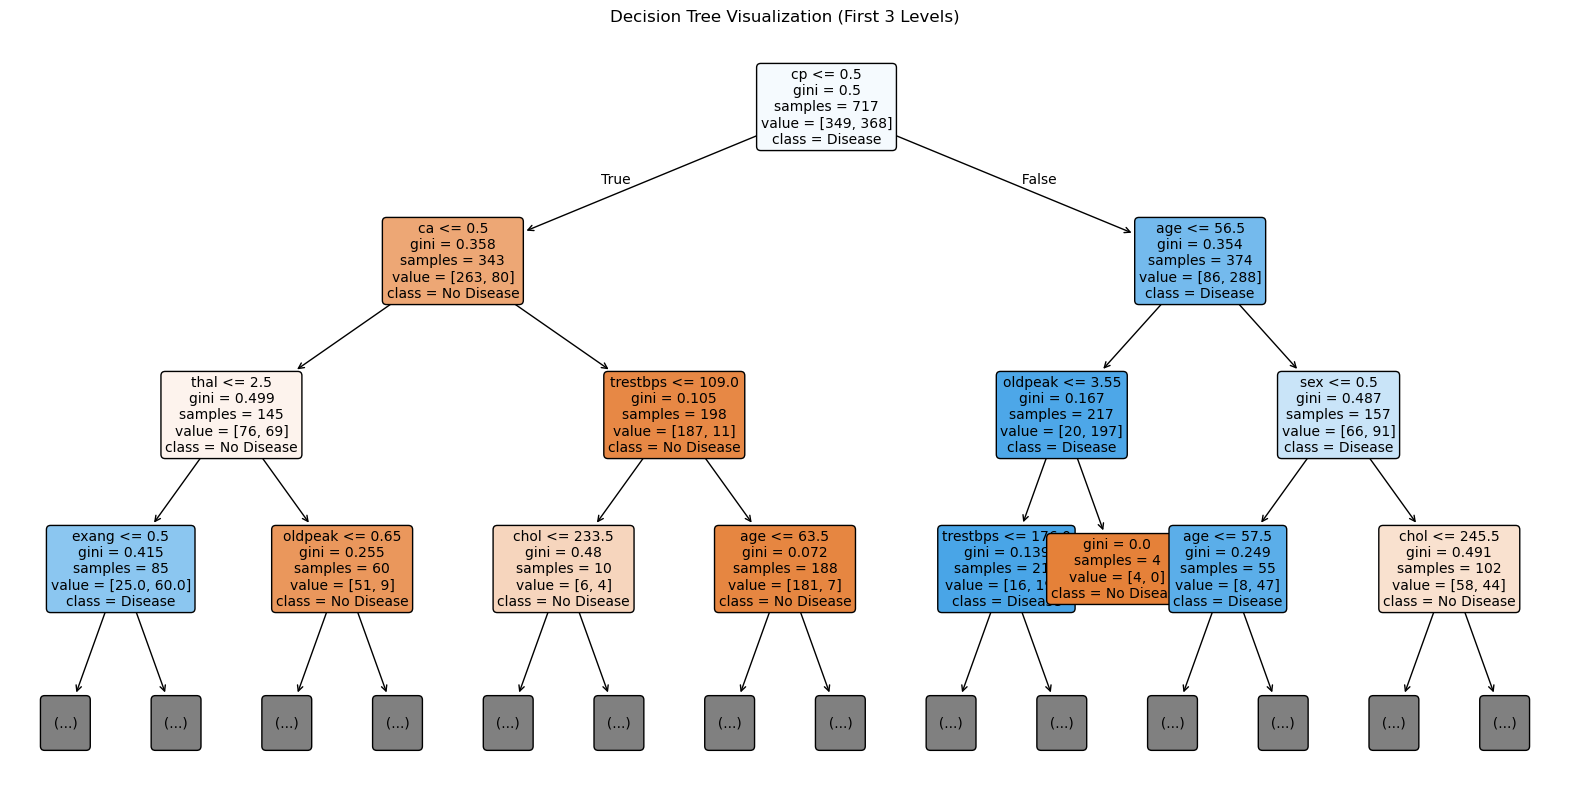

DECISION TREE RULES (First 3 levels):
|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- exang >  0.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- oldpeak >  0.65
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|   |   |   |--- chol <= 233.50
|   |   |   |   |--- class: 1
|   |   |   |--- chol >  233.50
|   |   |   |   |--- class: 0
|   |   |--- trestbps >  109.00
|   |   |   |--- age <= 63.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- age >  63.50
|   |   |   |   |--- truncated branch of depth 3
|--- cp >  0.50
|   |--- age <= 56.50
|   |   |--- oldpeak <= 3.55
|   |   |   |--- trestbps <= 176.00
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- trestbps >  176.00
|   |   |   |  

In [4]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_basic, 
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limit depth for readability
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.show()

# Text representation of the tree (first few levels)
tree_rules = export_text(dt_basic, 
                        feature_names=list(X.columns),
                        max_depth=3)
print("DECISION TREE RULES (First 3 levels):")
print(tree_rules)

Optimal Tree Depth: 9
Best Test Accuracy: 0.9805

Optimal Decision Tree Performance:
Accuracy: 0.9805
Depth: 9
Leaves: 49


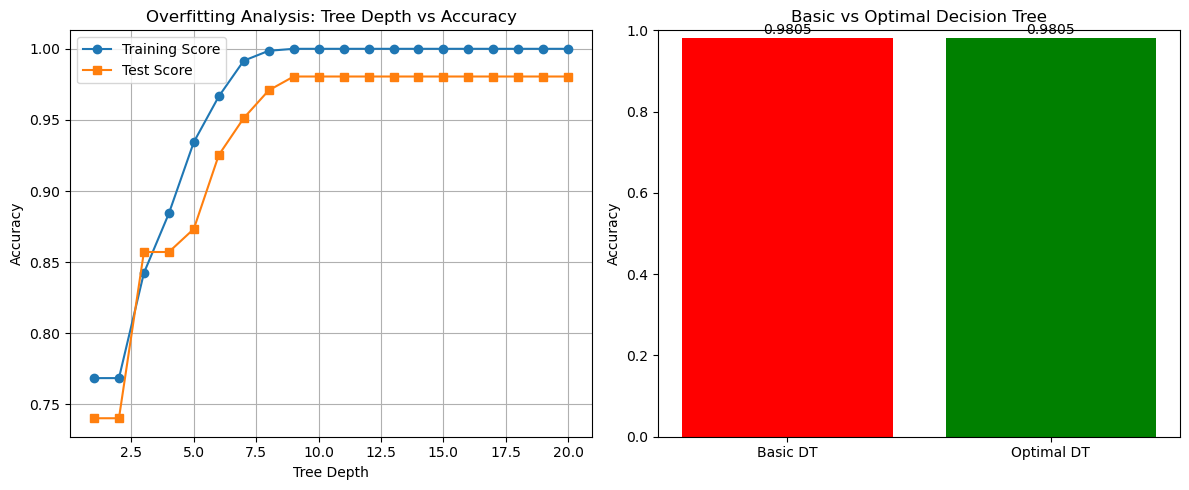

In [5]:
# Test different tree depths to analyze overfitting
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(depths, train_scores, label='Training Score', marker='o')
plt.plot(depths, test_scores, label='Test Score', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Tree Depth vs Accuracy')
plt.legend()
plt.grid(True)

# Find optimal depth
optimal_depth = depths[np.argmax(test_scores)]
print(f"Optimal Tree Depth: {optimal_depth}")
print(f"Best Test Accuracy: {max(test_scores):.4f}")

# Train with optimal depth
dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_optimal.fit(X_train, y_train)

y_pred_dt_optimal = dt_optimal.predict(X_test)
accuracy_dt_optimal = accuracy_score(y_test, y_pred_dt_optimal)

print(f"\nOptimal Decision Tree Performance:")
print(f"Accuracy: {accuracy_dt_optimal:.4f}")
print(f"Depth: {dt_optimal.get_depth()}")
print(f"Leaves: {dt_optimal.get_n_leaves()}")

# Compare basic vs optimal
plt.subplot(1, 2, 2)
models = ['Basic DT', 'Optimal DT']
accuracies = [accuracy_dt_basic, accuracy_dt_optimal]
plt.bar(models, accuracies, color=['red', 'green'])
plt.ylabel('Accuracy')
plt.title('Basic vs Optimal Decision Tree')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

In [6]:
# Create and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("RANDOM FOREST CLASSIFIER:")
print("=" * 50)
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {auc_rf:.4f}")
print(f"Number of Trees: {len(rf.estimators_)}")

RANDOM FOREST CLASSIFIER:
Accuracy:  0.9805
Precision: 1.0000
Recall:    0.9620
F1-Score:  0.9806
ROC-AUC:   0.9992
Number of Trees: 100


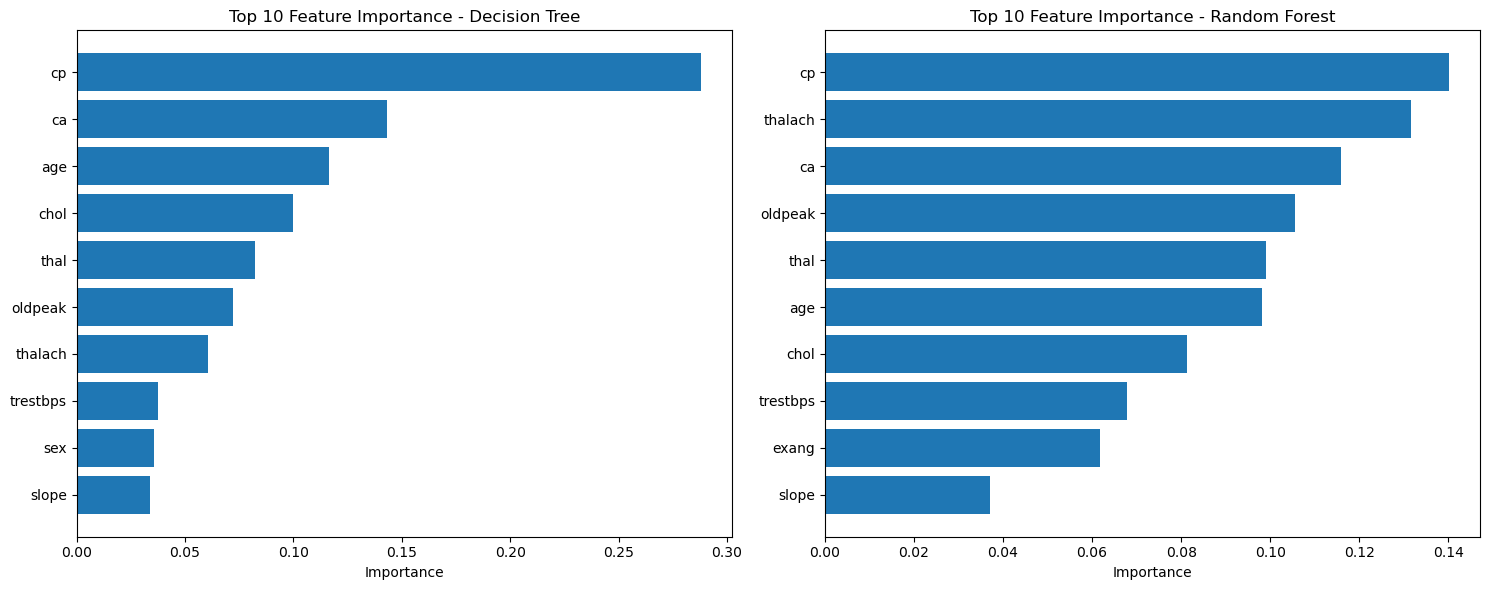

TOP 5 FEATURES - DECISION TREE:
   feature  importance_dt
2       cp       0.287836
11      ca       0.143395
0      age       0.116541
4     chol       0.099582
12    thal       0.082431

TOP 5 FEATURES - RANDOM FOREST:
    feature  importance_rf
2        cp       0.140129
7   thalach       0.131526
11       ca       0.116020
9   oldpeak       0.105527
12     thal       0.099114


In [7]:
# Get feature importances from both models
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_dt': dt_optimal.feature_importances_
}).sort_values('importance_dt', ascending=False)

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_rf': rf.feature_importances_
}).sort_values('importance_rf', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.barh(dt_importance['feature'][:10], dt_importance['importance_dt'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - Decision Tree')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(rf_importance['feature'][:10], rf_importance['importance_rf'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - Random Forest')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print("TOP 5 FEATURES - DECISION TREE:")
print(dt_importance.head(5))
print("\nTOP 5 FEATURES - RANDOM FOREST:")
print(rf_importance.head(5))

MODEL COMPARISON:
                     Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0    Decision Tree (Basic)    0.9805        1.0   0.962    0.9806   0.9810
1  Decision Tree (Optimal)    0.9805        1.0   0.962    0.9806   0.9810
2            Random Forest    0.9805        1.0   0.962    0.9806   0.9992


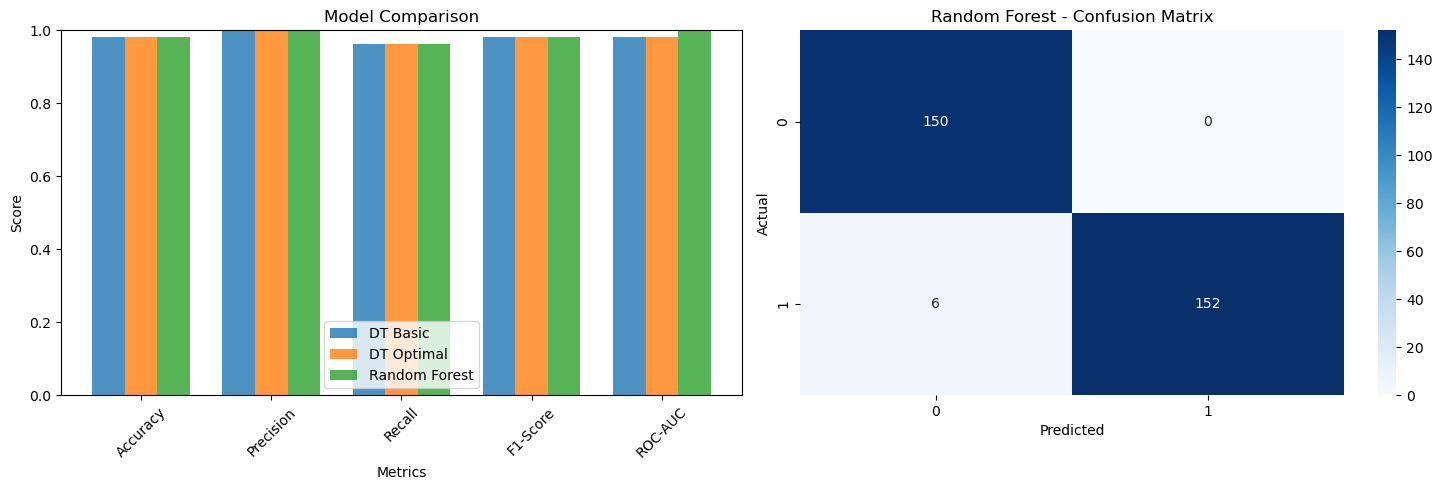

In [8]:
# Compare all models
models_comparison = pd.DataFrame({
    'Model': ['Decision Tree (Basic)', 'Decision Tree (Optimal)', 'Random Forest'],
    'Accuracy': [accuracy_dt_basic, accuracy_dt_optimal, accuracy_rf],
    'Precision': [precision_dt_basic, precision_score(y_test, y_pred_dt_optimal), precision_rf],
    'Recall': [recall_dt_basic, recall_score(y_test, y_pred_dt_optimal), recall_rf],
    'F1-Score': [f1_dt_basic, f1_score(y_test, y_pred_dt_optimal), f1_rf],
    'ROC-AUC': [auc_dt_basic, roc_auc_score(y_test, dt_optimal.predict_proba(X_test)[:, 1]), auc_rf]
})

print("MODEL COMPARISON:")
print("=" * 80)
print(models_comparison.round(4))

# Visual comparison
plt.figure(figsize=(15, 5))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x_pos = np.arange(len(metrics))

plt.subplot(1, 2, 1)
width = 0.25
plt.bar(x_pos - width, models_comparison.iloc[0, 1:], width, label='DT Basic', alpha=0.8)
plt.bar(x_pos, models_comparison.iloc[1, 1:], width, label='DT Optimal', alpha=0.8)
plt.bar(x_pos + width, models_comparison.iloc[2, 1:], width, label='Random Forest', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x_pos, metrics, rotation=45)
plt.legend()
plt.ylim(0, 1)

# Confusion Matrix Comparison
plt.subplot(1, 2, 2)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

CROSS-VALIDATION RESULTS (5-fold):
Decision Tree CV Accuracy: 0.9980 (+/- 0.0078)
Random Forest CV Accuracy: 0.9971 (+/- 0.0117)


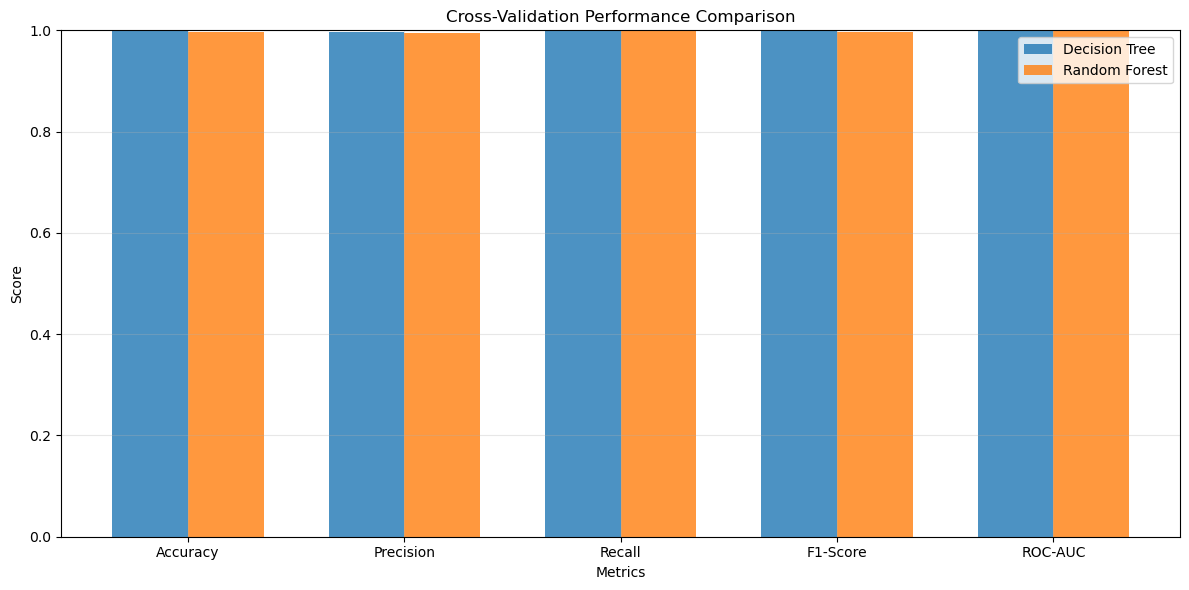

In [9]:
# Perform cross-validation
print("CROSS-VALIDATION RESULTS (5-fold):")
print("=" * 50)

# Decision Tree CV
dt_cv_scores = cross_val_score(dt_optimal, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")

# Random Forest CV
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

# Additional CV metrics
cv_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = {}

for metric in cv_metrics:
    dt_scores = cross_val_score(dt_optimal, X, y, cv=5, scoring=metric)
    rf_scores = cross_val_score(rf, X, y, cv=5, scoring=metric)
    cv_results[f'DT_{metric}'] = dt_scores
    cv_results[f'RF_{metric}'] = rf_scores

# Plot CV results
plt.figure(figsize=(12, 6))
cv_metrics_display = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
dt_means = [cv_results[f'DT_{metric}'].mean() for metric in cv_metrics]
rf_means = [cv_results[f'RF_{metric}'].mean() for metric in cv_metrics]

x_pos = np.arange(len(cv_metrics_display))
width = 0.35

plt.bar(x_pos - width/2, dt_means, width, label='Decision Tree', alpha=0.8)
plt.bar(x_pos + width/2, rf_means, width, label='Random Forest', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Cross-Validation Performance Comparison')
plt.xticks(x_pos, cv_metrics_display)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using smaller grid for demonstration (to save time)
param_grid_simple = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

print("Performing Grid Search for Random Forest...")
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid_simple,
                      cv=3,
                      scoring='accuracy',
                      n_jobs=-1)

rf_grid.fit(X_train, y_train)

print("Best parameters found:")
print(rf_grid.best_params_)
print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")

# Train with best parameters
rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

print(f"\nTuned Random Forest Test Accuracy: {accuracy_rf_best:.4f}")

Performing Grid Search for Random Forest...
Best parameters found:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9623

Tuned Random Forest Test Accuracy: 0.9805
